# CIFAR-10 Image Classification with TensorFlow CNN
### Sanjeev Kumar (MS CS @ Pace University)

Import necessary packages and loading cifar10 dataset from keras inbuilt libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import keras.regularizers as reg
import numpy as np


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
# Creating labels list for our understanding
labels=['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck',
        ]

Visualizing the dataset using matlplotlib

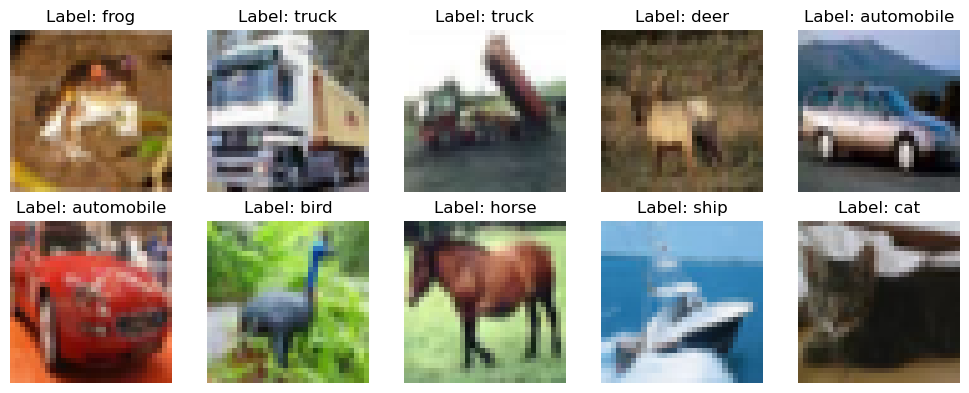

In [6]:
import matplotlib.pyplot as plt

# Display a few sample images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {labels[int(y_train[i])]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [7]:
x_train = x_train/255
x_test = x_test/255

Converting the labels to one-hot encoded vectors to align with the ouput neurons

In [8]:
# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


### Architecture Overview:
- The CNN consists of several layers, including convolutional layers, batch normalization layers, max-pooling layers, and dropout layers.

- Convolutional layers use 3x3 filters with ReLU activation to extract features from the input images. Batch normalization is applied after each convolutional layer to stabilize and accelerate training.

- Max-pooling layers with a (2, 2) pool size are used to downsample the feature maps and reduce spatial dimensions.

- Dropout layers are employed to prevent overfitting and improve the model's generalization.

- The final part of the network includes fully connected layers (dense layers) with ReLU activation and batch normalization.

- The last dense layer with a softmax activation function outputs the probabilities of the 10 classes (0 to 9) for classification.

In [9]:
model = tf.keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), kernel_initializer="he_uniform", activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), kernel_initializer="he_uniform", activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Flatten the input
    layers.Flatten(),

    # Dense layers
    layers.Dense(128, kernel_initializer="he_uniform", activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


Using 'accuracy' metrics for evaluation

In [10]:
metrics = ['accuracy']


#### Model Compilation

This code block compiles the neural network model before training. The `model.compile()` function is used to set up the training process with the following configurations:

1. **Optimizer**: Stochastic Gradient Descent (SGD) is chosen as the optimizer for the model. SGD is a popular optimization algorithm used to minimize the loss function during training. The learning rate is set to 0.001, which controls the step size for gradient updates. Additionally, momentum is set to 0.9, which helps accelerate learning by accumulating past gradients.

2. **Loss Function**: Categorical Crossentropy is selected as the loss function. Categorical Crossentropy is appropriate for multi-class classification tasks, where the target labels are one-hot encoded. It measures the dissimilarity between predicted probabilities and true class labels.

3. **Metrics**: The `metrics` variable is used to define the evaluation metric for the model. It is set to 'accuracy', indicating that the model's performance will be evaluated based on the accuracy of predictions during training.

The model is now ready to be trained using the compiled settings. During training, the model will use SGD to update the model's parameters (weights and biases) in such a way that the Categorical Crossentropy loss is minimized. The training process will aim to optimize the model's ability to classify the input data correctly, and the progress will be monitored based on the accuracy metric.


In [11]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=metrics)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

The code applies data augmentation to the CIFAR-10 dataset for better training. The ImageDataGenerator class from TensorFlow's Keras library is used with the following augmentation techniques:

*Width and Height Shift*: Images are horizontally and vertically shifted randomly by up to 10% of their width and height, respectively.

*Horizontal Flip*: Images are randomly flipped horizontally.

The ImageDataGenerator object is then used to generate augmented data in batches (batch_size=64). Data augmentation helps increase the dataset's diversity, reducing overfitting, and enhancing the model's generalization for CIFAR-10 image classification.



In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

augment_data = datagen.flow(x_train, y_train, batch_size=64)

In [ ]:
checkpoint_callback = ModelCheckpoint(
    filepath='checkpoints/' + 'epoch_{epoch:03d}_val_loss_{val_loss:.4f}.h5',  # Save format
    save_weights_only=False,  # Save only the model weights, not the entire model
    save_best_only=False,  # Set to True if you want to save only the best model based on a metric
    monitor='val_loss',  # Metric to monitor for saving the best model
    verbose=1  # Set to 1 to see progress in the notebook
)a

In [ ]:
history = model.fit(augment_data, 
                    epochs=200, 
                    steps_per_epoch=x_train.shape[0]/64, 
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_callback]
                   )

Plotting Epochs and Accuracy as a line graph

In [ ]:
plt.plot(history.epoch, history.history['val_accuracy'])
plt.plot(history.epoch, np.array(history.history['accuracy']))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.show()

## Real Time Testing 

In [ ]:
image_path = 'test_images/cat_test_2.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0  # Normalize pixel values
image = np.expand_dims(image, axis=0)

In [ ]:
labels[np.argmax(model.predict(image))]